# Hamiltonian Monte Carlo Performance Experiments
This notebook is used to generate evaluation data by running experiments on the Hamiltonian Monte Carlo implementation.
This notebook contains a modified version of the neural network code from the ProbabilisticLayers notebook, in order to make it work for the sampling code.
The cells in this notebook simply runs HMC sampling for all the experiments shown in the final report. The output is unfortunately printed out by the AdvancedHMC.jl library, and there is no programmatic way of accessing it. The last few cells collected data from the prints, and creates figures.

! NOTE ! If running this notebook, ensure that there is a subfolder called images in the same location as this notebook. Otherwise there will be failures.

! NOTE ! The plots are generated with static data from the print statements of AdvancedHMC.jl, rerunning the notebook may have different results.

! NOTE ! This notebook usually takes ~3 minutes to run using Zygote AD back-end. It can take a very long time > 30 minutes using ForwardDiff.

In [1]:
begin
    using Random
    using Plots
    using Zygote
    include("./BayesHMC.jl")
    using .BayesHMC
    include("./Datasets.jl")
    using .Datasets
end

In [2]:
begin
    # Automatic Differentiation back-end used for HMC. Tested with ForwardDiff, and Zygote. This variable controls the AD back-end for all experiments in this notebook.
    # Change the backend to ForwardDiff to see results for that AD back-end. It can take a very long time for the notebook to execute.
    diff_backend = Zygote
    # Set random seed for reproducibility.
    Random.seed!(0)
    # Build dataset
    inputs, targets = build_dataset_1()
    # Define the neural network once
    num_weights, predictions, logprob = make_neural_network_functions([1, 20, 20, 1], 0.1, 0.01, rbf)
    log_posterior(weights) = logprob(weights, inputs, targets)
end

log_posterior (generic function with 1 method)

# Experiment 1 - Increasing Sample Size
This experiment runs sample sizes 10, 20, 30, 40, and 50 with adapts fixed to 5.
The total running time for sampling and average acceptance rate is taken from the output printed.

In [3]:
begin
    sample_sizes = collect(10:10:50)
    for sample_size in sample_sizes
        run_hmc_sampler(sample_size, 5, num_weights, log_posterior)
    end
end

┌ Info: Finished 5 adapation steps
│   adaptor = StanHMCAdaptor(
    pc=WelfordVar,
    ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.8, state.ϵ=0.004871404697348373),
    init_buffer=75, term_buffer=50, window_size=25,
    state=window(76, -45), window_splits()
)
│   κ.τ.integrator = Leapfrog(ϵ=0.00487)
│   h.metric = DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])
└ @ AdvancedHMC C:\Users\andre\.julia\packages\AdvancedHMC\51xgc\src\sampler.jl:189
┌ Info: Finished 10 sampling steps for 1 chains in 2.776346 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...]))
│   κ = AdvancedHMC.HMCKernel{AdvancedHMC.FullMomentumRefreshment, AdvancedHMC.Trajectory{AdvancedHMC.MultinomialTS, AdvancedHMC.Leapfrog{Float64}, AdvancedHMC.GeneralisedNoUTurn{Float64}}}(AdvancedHMC.FullMomentumRefreshment(), Trajectory{AdvancedHMC.MultinomialTS}(integrator=Leapfrog(ϵ=0.00487), tc=AdvancedHMC.GeneralisedNoUTurn{Float64}(10, 1000.0)))
│   EBFMI_est = 2.29093804150

# Experiment 2 - Increasing Adapts

In [4]:
begin
    adapts = collect(0:10)
    for adapt in adapts
        run_hmc_sampler(50, adapt, num_weights, log_posterior)
    end
end

┌ Info: Finished 50 sampling steps for 1 chains in 0.1764878 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...]))
│   κ = AdvancedHMC.HMCKernel{AdvancedHMC.FullMomentumRefreshment, AdvancedHMC.Trajectory{AdvancedHMC.MultinomialTS, AdvancedHMC.Leapfrog{Float64}, AdvancedHMC.GeneralisedNoUTurn{Float64}}}(AdvancedHMC.FullMomentumRefreshment(), Trajectory{AdvancedHMC.MultinomialTS}(integrator=Leapfrog(ϵ=0.0125), tc=AdvancedHMC.GeneralisedNoUTurn{Float64}(10, 1000.0)))
│   EBFMI_est = 0.05700425149426635
│   average_acceptance_rate = 0.12601430740842745
└ @ AdvancedHMC C:\Users\andre\.julia\packages\AdvancedHMC\51xgc\src\sampler.jl:214
┌ Info: Finished 1 adapation steps
│   adaptor = StanHMCAdaptor(
    pc=WelfordVar,
    ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.8, state.ϵ=0.1070157552959158),
    init_buffer=75, term_buffer=50, window_size=25,
    state=window(76, -49), window_splits()
)
│   κ.τ.integrator = Leapfrog(ϵ=0.107)
│   h.metric = D

┌ Info: Finished 50 sampling steps for 1 chains in 13.0493474 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...]))
│   κ = AdvancedHMC.HMCKernel{AdvancedHMC.FullMomentumRefreshment, AdvancedHMC.Trajectory{AdvancedHMC.MultinomialTS, AdvancedHMC.Leapfrog{Float64}, AdvancedHMC.GeneralisedNoUTurn{Float64}}}(AdvancedHMC.FullMomentumRefreshment(), Trajectory{AdvancedHMC.MultinomialTS}(integrator=Leapfrog(ϵ=0.0028), tc=AdvancedHMC.GeneralisedNoUTurn{Float64}(10, 1000.0)))
│   EBFMI_est = 0.6829964306952903
│   average_acceptance_rate = 0.6612339650485619
└ @ AdvancedHMC C:\Users\andre\.julia\packages\AdvancedHMC\51xgc\src\sampler.jl:214
┌ Info: Finished 10 adapation steps
│   adaptor = StanHMCAdaptor(
    pc=WelfordVar,
    ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.8, state.ϵ=0.003219500902206755),
    init_buffer=75, term_buffer=50, window_size=25,
    state=window(76, -40), window_splits()
)
│   κ.τ.integrator = Leapfrog(ϵ=0.00322)
│   h.metric

# ForwardDiff Plotting Experiment Data

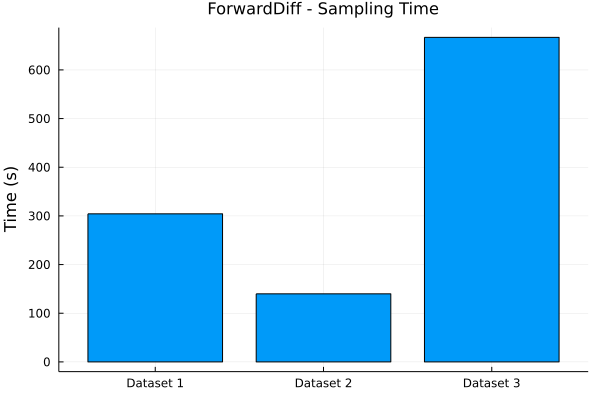

In [5]:
begin
    times = [304.234, 139.801, 666.909]
    ylabels = ["Dataset 1", "Dataset 2", "Dataset 3"]
    fd_sampling = bar(ylabels, times, label="", title="ForwardDiff - Sampling Time", ylabel="Time (s)", titlefontsize=11)
    savefig(fd_sampling, "images/forward_sampling_time.png")
    current()
end

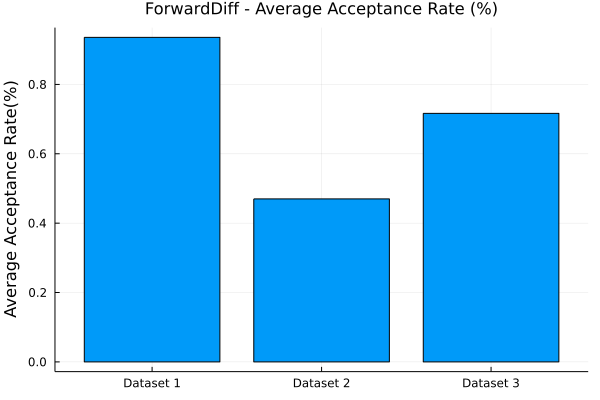

In [6]:
begin
    times = [0.9357, 0.4699, 0.7166]
    ylabels = ["Dataset 1", "Dataset 2", "Dataset 3"]
    fd_avg_acceptance = bar(ylabels, times, label="", title="ForwardDiff - Average Acceptance Rate (%)", ylabel="Average Acceptance Rate(%)", titlefontsize=11)
    savefig(fd_avg_acceptance, "images/forward_average_acceptance.png")
    current()
end

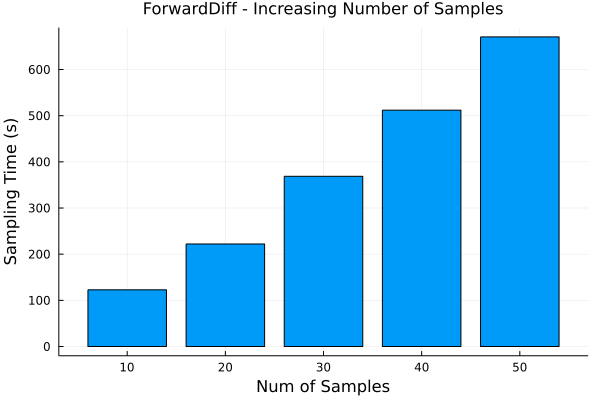

In [7]:
begin
    times_exp_1 = [122.8130329, 222.0697514, 368.6357424, 511.9018468, 670.6136887]
    fd_1 = bar([string(i) for i in 10:10:50], times_exp_1, label="", title="ForwardDiff - Increasing Number of Samples", xlabel="Num of Samples", ylabel="Sampling Time (s)", titlefontsize=11)
    savefig(fd_1, "images/forward_time_vs_samples.png")
    current()
end

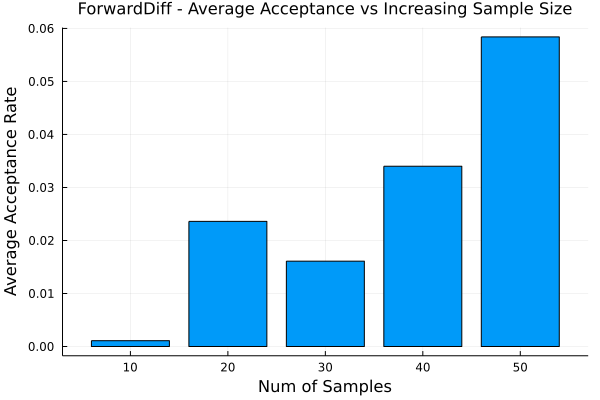

In [8]:
begin
    accepts = [0.0011, 0.0236, 0.0161, 0.0340, 0.0584]
    fd_2 = bar([string(i) for i in 10:10:50], accepts, label="", title="ForwardDiff - Average Acceptance vs Increasing Sample Size", xlabel="Num of Samples", ylabel="Average Acceptance Rate", titlefontsize=11)
    savefig(fd_2, "images/forward_acceptance_vs_samples.png")
    current()
end

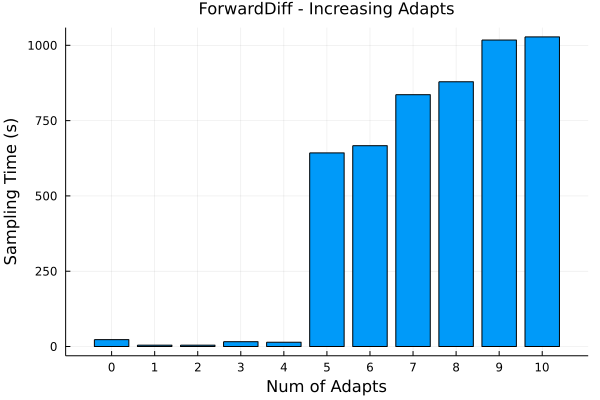

In [9]:
begin
    times_exp_2 = [22.7190668, 4.422797, 4.4115758, 15.9278964, 14.2161519, 642.8452905, 666.7616154, 836.140891, 879.0121533, 1017.5494517, 1027.9404283]
    x_plot = [string(i) for i in 0:10]
    fd_3 = bar(x_plot, times_exp_2, label="", title="ForwardDiff - Increasing Adapts", xlabel="Num of Adapts", ylabel="Sampling Time (s)", titlefontsize=11)
    savefig(fd_3, "images/forward_time_vs_adapts.png")
    current()
end

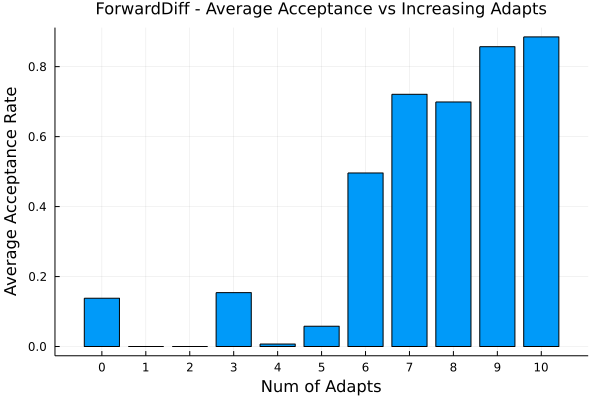

In [10]:
begin
    accepts_exp_1 = [0.138, 0.0, 0.0, 0.154, 0.007, 0.058, 0.496, 0.721, 0.699, 0.857, 0.885]
    fd_4 = bar([string(i) for i in 0:10], accepts_exp_1, label="", title="ForwardDiff - Average Acceptance vs Increasing Adapts", xlabel="Num of Adapts", ylabel="Average Acceptance Rate", titlefontsize=11)
    savefig(fd_4, "images/forward_acceptance_vs_adapts.png")
    current()
end

# Zygote Plotting Experiment Data

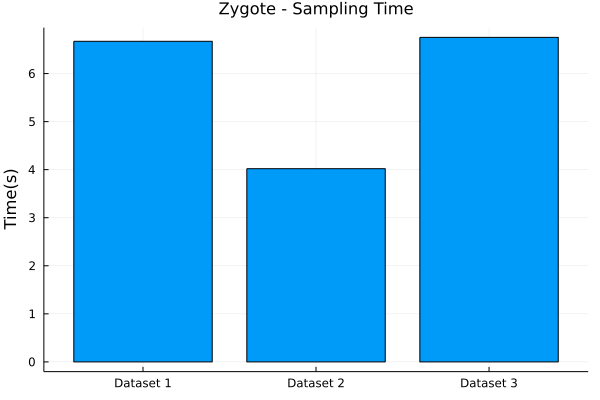

In [11]:
begin
    times = [6.671, 4.02, 6.753]
    ylabels = ["Dataset 1", "Dataset 2", "Dataset 3"]
    zy_sampling = bar(ylabels, times, label="", title="Zygote - Sampling Time", ylabel="Time(s)", titlefontsize=11)
    savefig(zy_sampling, "images/zygote_sampling_time.png")
    current()
end

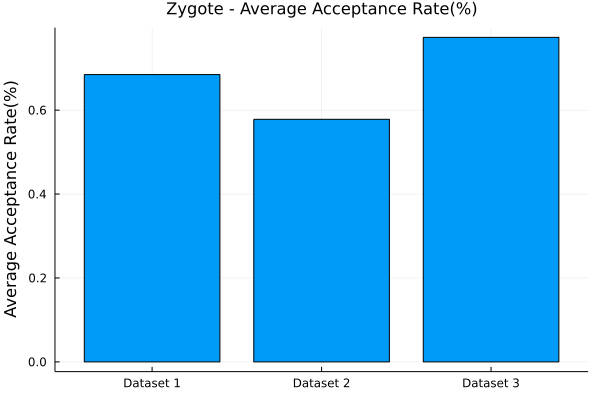

In [12]:
begin
    times = [0.6849, 0.5782, 0.7735]
    ylabels = ["Dataset 1", "Dataset 2", "Dataset 3"]
    zy_avg_acceptance = bar(ylabels, times, label="", title="Zygote - Average Acceptance Rate(%)", ylabel="Average Acceptance Rate(%)", titlefontsize=11)
    savefig(zy_avg_acceptance, "images/zygote_average_acceptance.png")
    current()
end

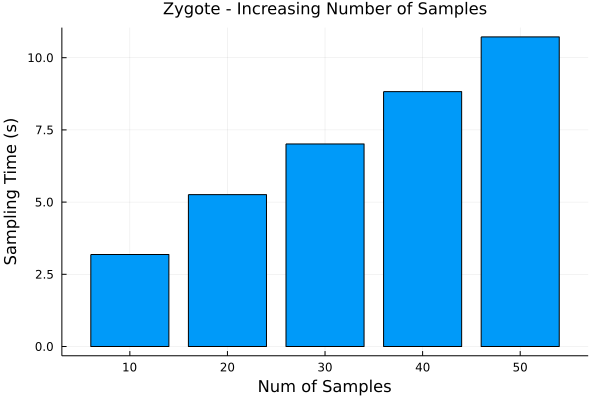

In [13]:
begin
    times_exp_1 = [3.185, 5.258, 7.014, 8.825, 10.72]
    zy_1 = bar([string(i) for i in 10:10:50], times_exp_1, label="", title="Zygote - Increasing Number of Samples", xlabel="Num of Samples", ylabel="Sampling Time (s)", titlefontsize=11)
    savefig(zy_1, "images/zygote_time_vs_samples.png")
    current()
end

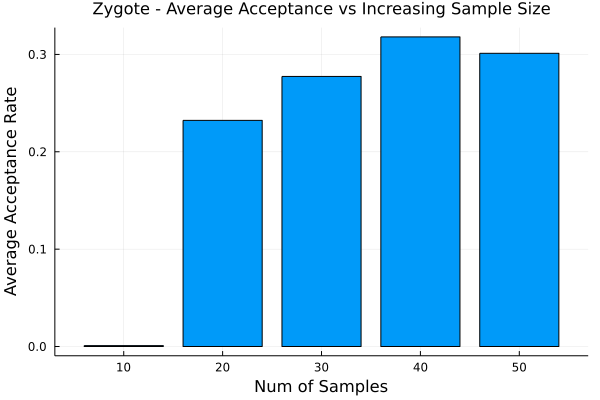

In [14]:
begin
    accepts = [0.0009, 0.2323, 0.2774, 0.318, 0.3012]
    zy_2 = bar([string(i) for i in 10:10:50], accepts, label="", title="Zygote - Average Acceptance vs Increasing Sample Size", xlabel="Num of Samples", ylabel="Average Acceptance Rate", titlefontsize=11)
    savefig(zy_2, "images/zygote_acceptance_vs_samples.png")
    current()
end

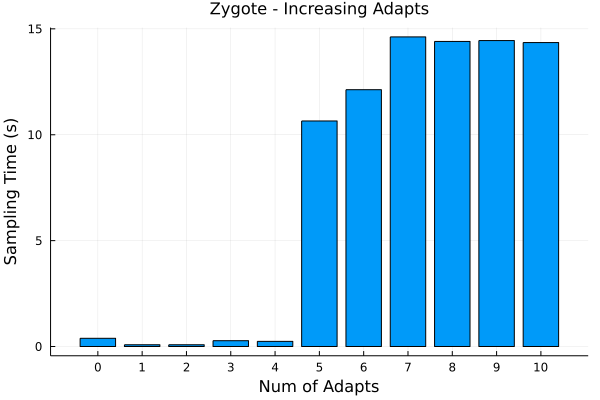

In [15]:
begin
    times_exp_2 = [0.389, 0.082, 0.082, 0.275, 0.244, 10.65, 12.126, 14.619, 14.407, 14.447, 14.353]
    x_plot = [string(i) for i in 0:10]
    zy_3 = bar(x_plot, times_exp_2, label="", title="Zygote - Increasing Adapts", xlabel="Num of Adapts", ylabel="Sampling Time (s)", titlefontsize=11)
    savefig(zy_3, "images/zygote_time_vs_adapts.png")
    current()
end

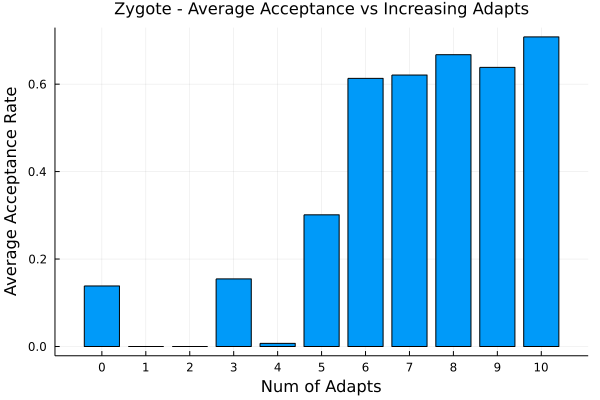

In [16]:
begin
    accepts_exp_1 = [0.1385, 0.0, 0.0, 0.1546, 0.0072, 0.3012, 0.6132, 0.6209, 0.6673, 0.6383, 0.708]
    zy_4 = bar([string(i) for i in 0:10], accepts_exp_1, label="", title="Zygote - Average Acceptance vs Increasing Adapts", xlabel="Num of Adapts", ylabel="Average Acceptance Rate", titlefontsize=11)
    savefig(zy_4, "images/zygote_acceptance_vs_adapts.png")
    current()
end